(110, 2)
prix           float64
date    datetime64[ns]
dtype: object
          prix
count  110.000
mean   524.244
std     86.251
min    448.000
25%    478.488
50%    504.830
75%    531.652
max    999.000


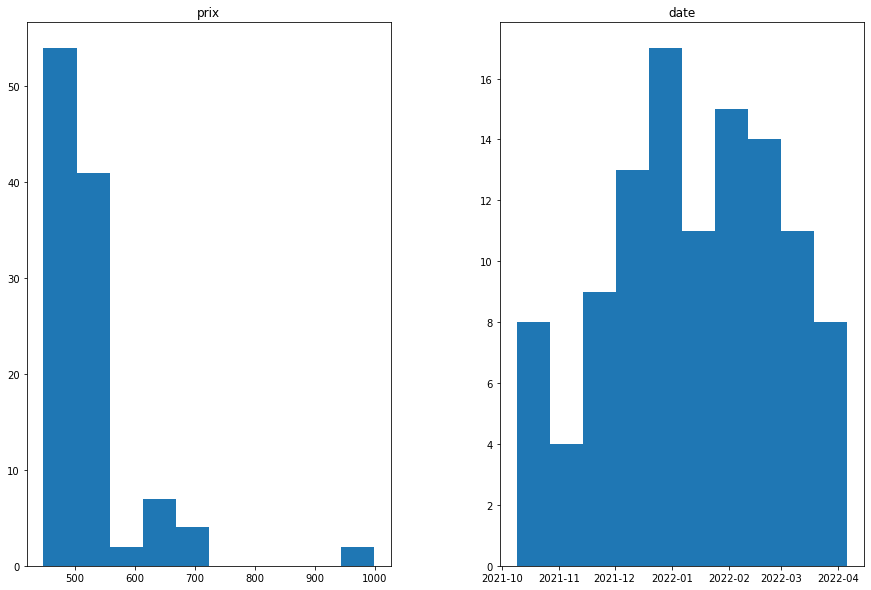

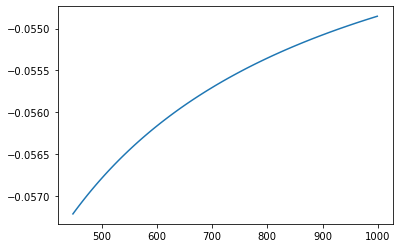

999.0
Comparaison des scores entre training, validation et test :  0.008649336378516614 -0.06716049949085634 -0.007409353546659281
train error 6529.281008689381
test error 5195.0689958084895
(143, 2)
prix           float64
date    datetime64[ns]
dtype: object
          prix
count  143.000
mean   164.519
std      7.440
min    150.990
25%    158.190
50%    163.800
75%    170.000
max    182.910


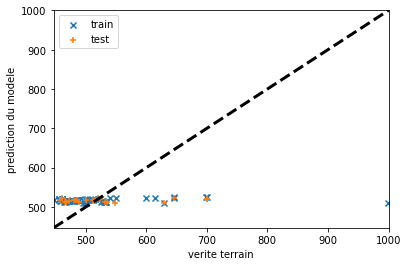

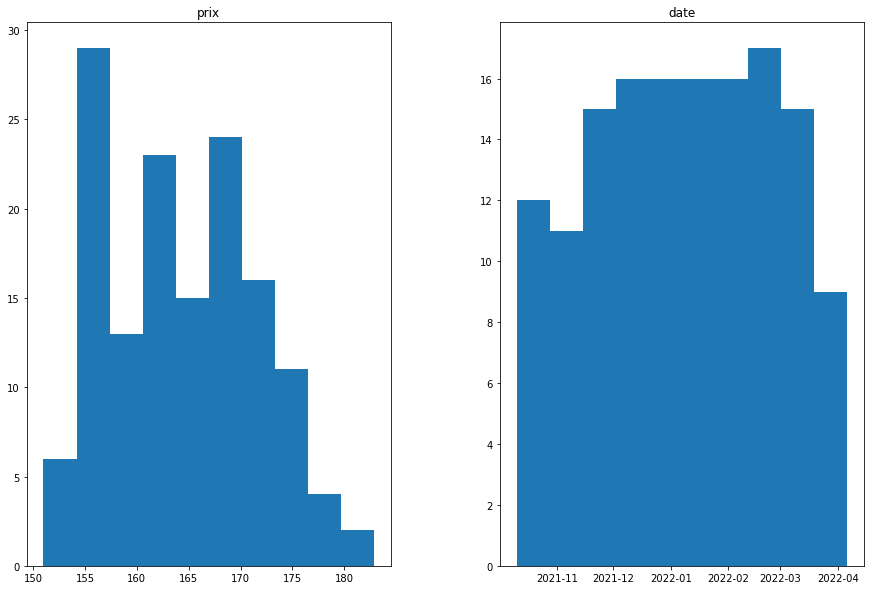

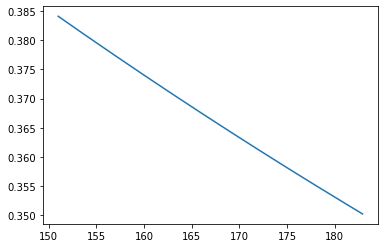

150.99
Comparaison des scores entre training, validation et test :  0.5135958281524875 0.49241717536457974 0.3415001812666433
train error 28.78827382471152
test error 38.119369206800314
(172, 2)
prix           float64
date    datetime64[ns]
dtype: object
          prix
count  172.000
mean    37.442
std      2.895
min     31.550
25%     34.920
50%     37.190
75%     39.975
max     45.260


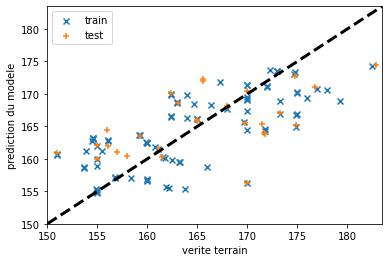

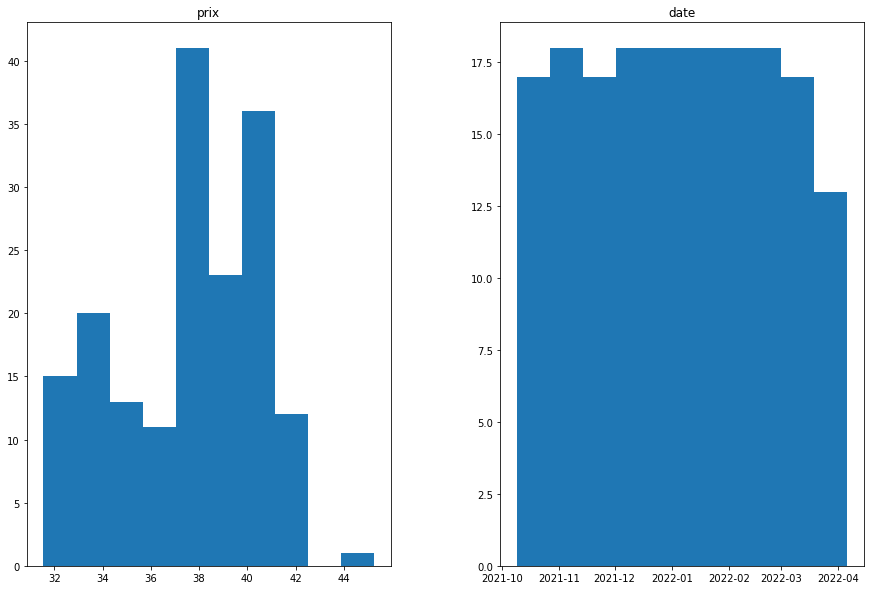

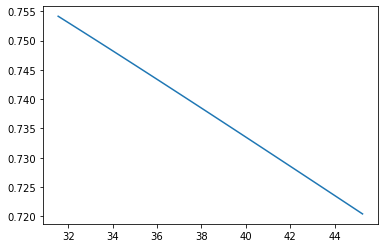

31.55
Comparaison des scores entre training, validation et test :  0.6661607107767786 0.8072083836325623 0.8914215248408777
train error 3.084011002203134
test error 0.6687207886434299
(60, 2)
prix           float64
date    datetime64[ns]
dtype: object
         prix
count  60.000
mean    4.742
std     2.532
min     2.680
25%     3.438
50%     3.910
75%     4.850
max    17.000


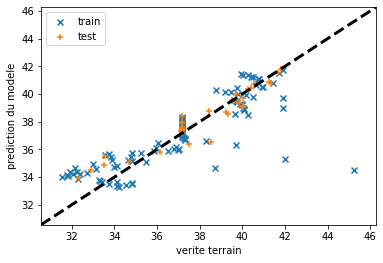

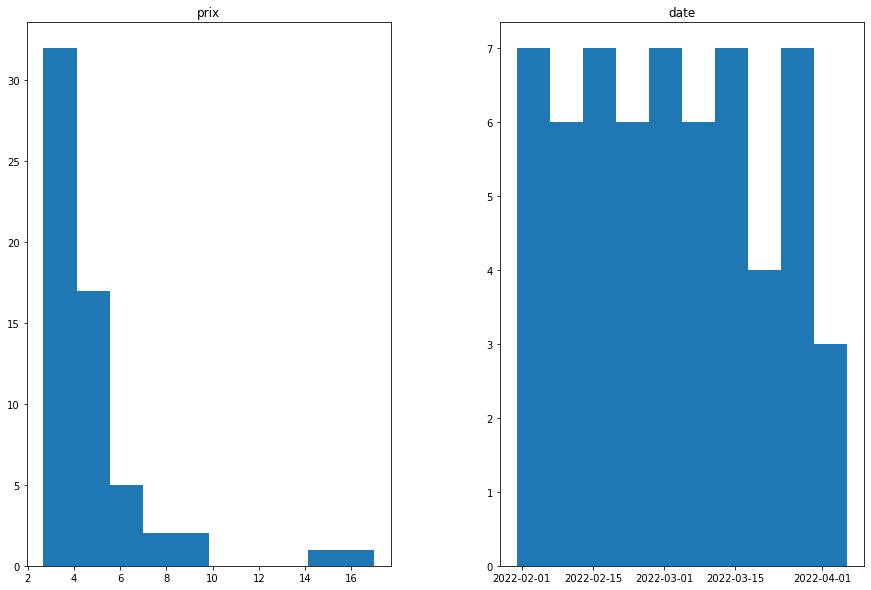

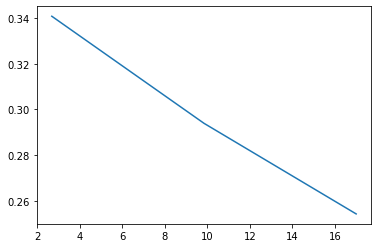

2.68
Comparaison des scores entre training, validation et test :  0.5398198977540056 0.36019116405086715 0.15624267755232513
train error 2.2711303738793256
test error 0.6135029804627247
(173, 2)
prix           float64
date    datetime64[ns]
dtype: object
          prix
count  173.000
mean    46.518
std      3.295
min     40.031
25%     43.956
50%     46.716
75%     49.608
max     53.375


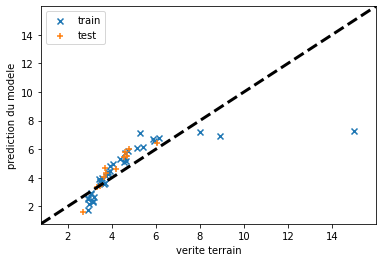

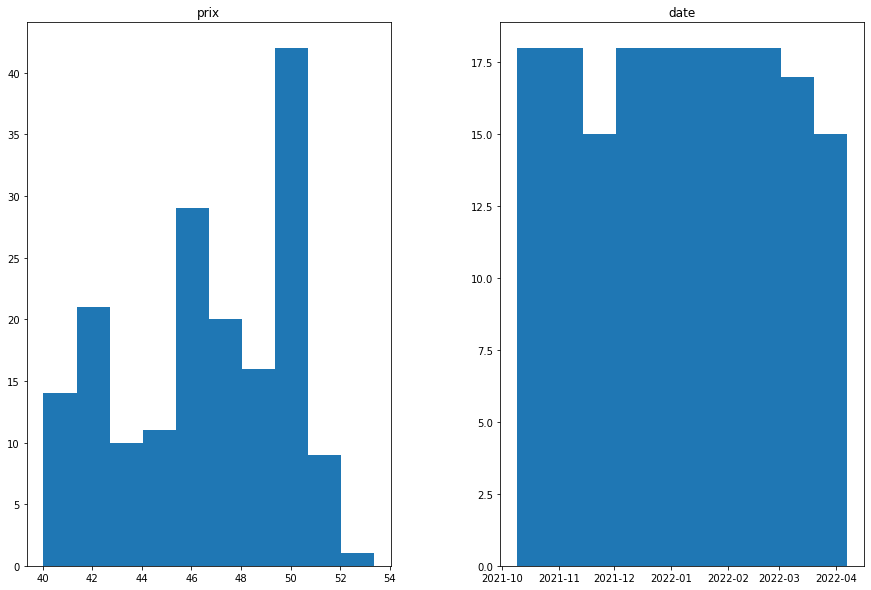

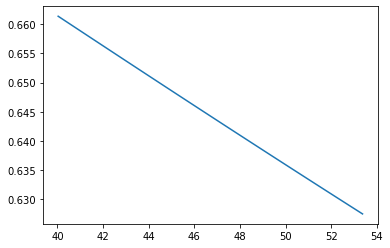

40.03139717425432
Comparaison des scores entre training, validation et test :  0.6533677461096774 0.7555288828220554 0.6178130720435124
train error 3.5582054906123965
test error 3.788264749777614
(24, 2)
prix           float64
date    datetime64[ns]
dtype: object
         prix
count  24.000
mean   24.861
std     6.795
min    13.420
25%    21.970
50%    23.500
75%    24.439
max    50.000


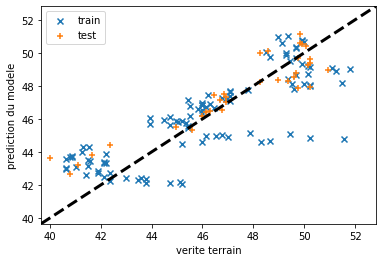

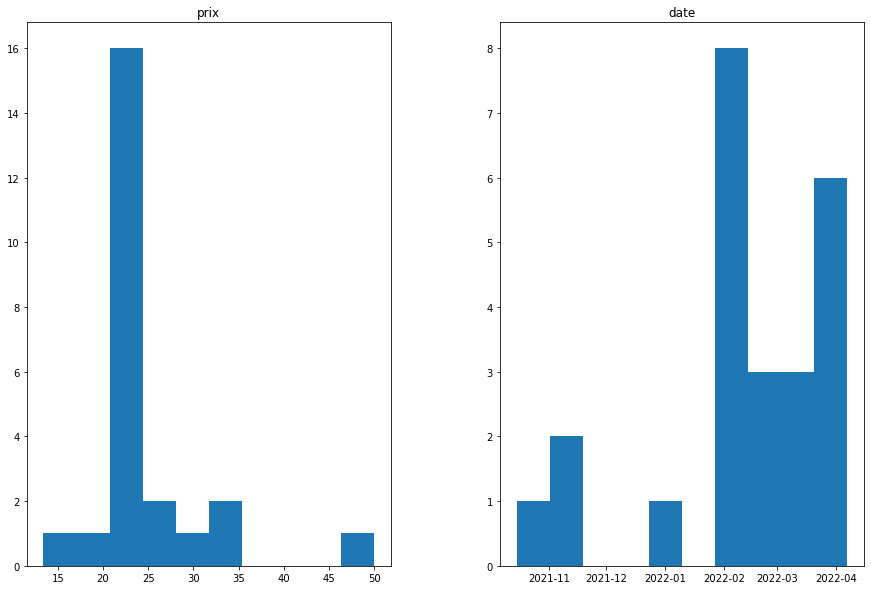

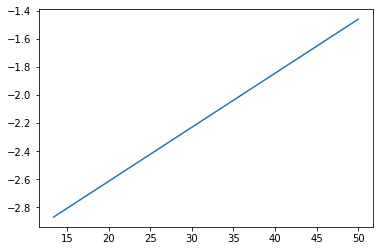

50.0
Comparaison des scores entre training, validation et test :  0.28168034109371853 -5.612799542997488 0.29584297140025373
train error 11.506069217655106
test error 85.60429528116008
(50, 2)
prix           float64
date    datetime64[ns]
dtype: object
           prix
count    50.000
mean    982.280
std     545.846
min     700.000
25%     806.250
50%     916.580
75%     917.595
max    4699.000


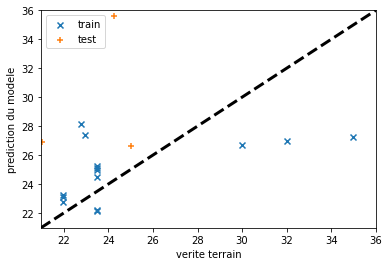

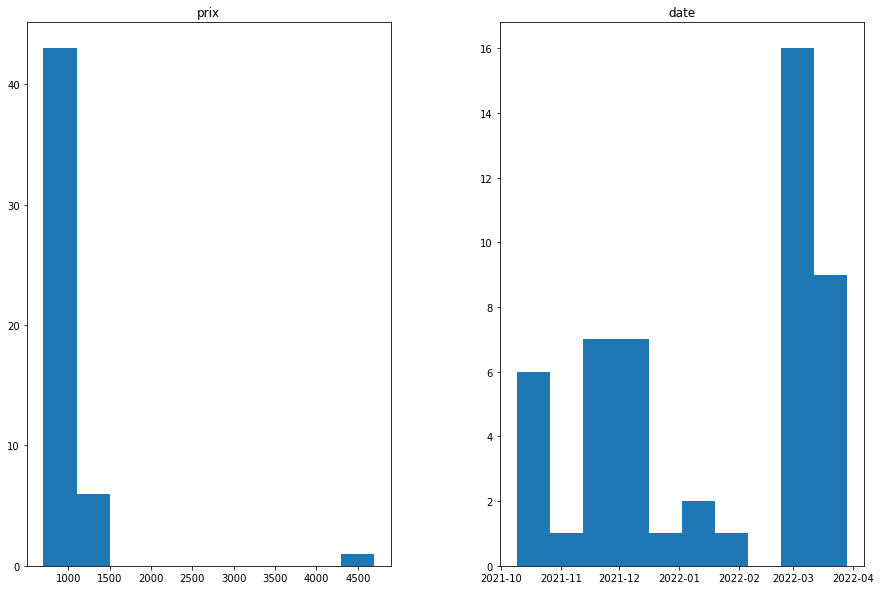

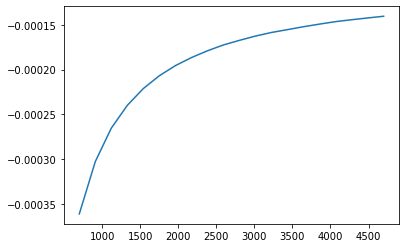

4699.0
Comparaison des scores entre training, validation et test :  0.0007791822771130441 -0.004243097863886325 -0.10241956235235938
train error 8013.322870289456
test error 1449068.0913388482
(169, 2)
prix           float64
date    datetime64[ns]
dtype: object
          prix
count  169.000
mean    38.895
std      3.884
min     31.850
25%     34.930
50%     39.700
75%     41.890
max     46.130


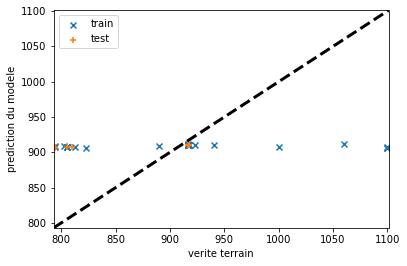

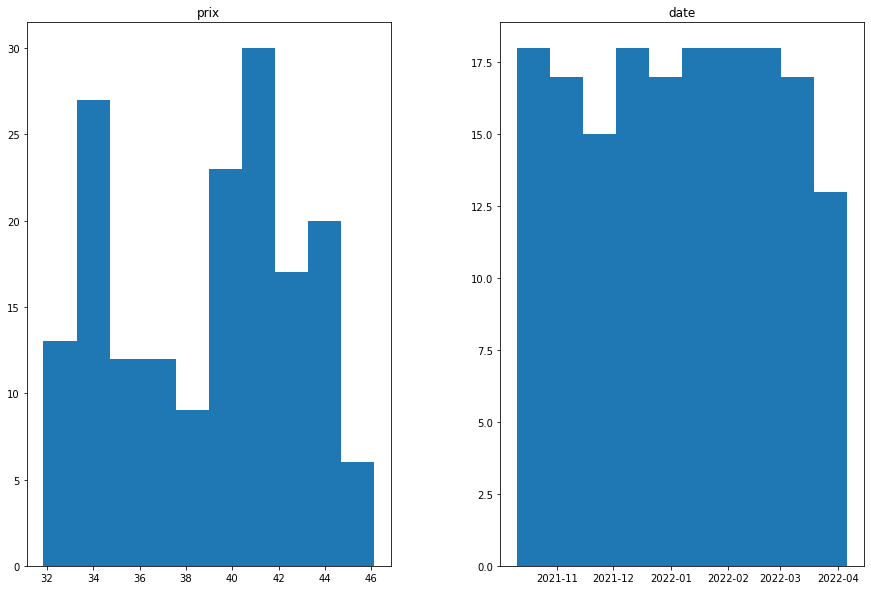

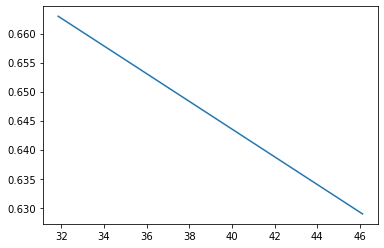

31.85
Comparaison des scores entre training, validation et test :  0.809133015365902 0.7261702126811701 0.6680977530360587
train error 2.977594331768473
test error 4.272321980045109
(44, 2)
prix           float64
date    datetime64[ns]
dtype: object
         prix
count  44.000
mean   71.841
std     5.246
min    66.000
25%    67.000
50%    72.445
75%    74.948
max    85.000


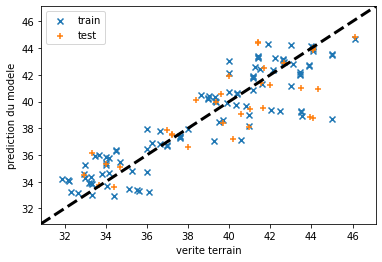

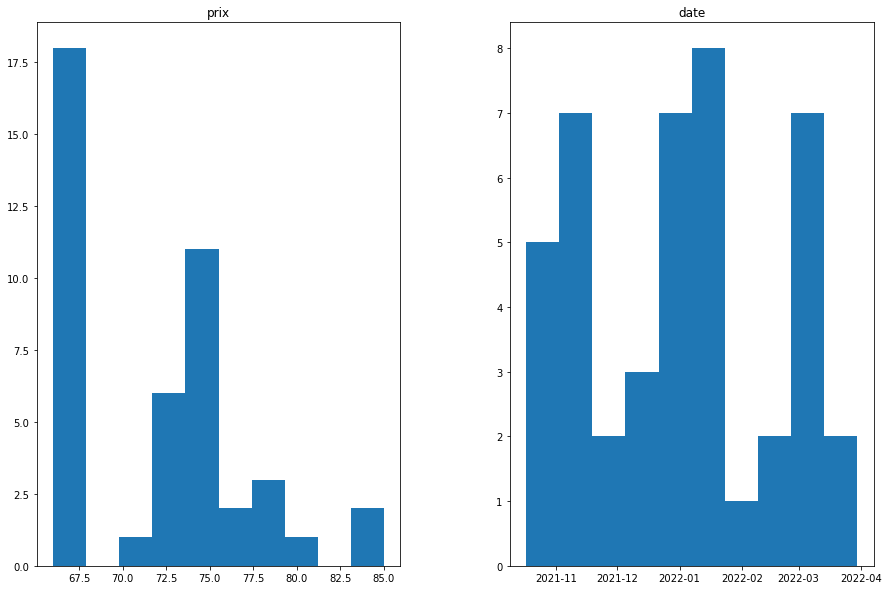

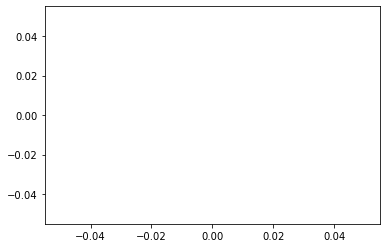

ValueError: attempt to get argmax of an empty sequence

In [49]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import *
import sklearn.linear_model
import sklearn.preprocessing
import os
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

def apprendre_skin(filename):
    dataset = pd.read_csv(filename)

    dataset["prix"] = dataset["prix"].astype(float)
    dataset["date"] = pd.to_datetime(dataset["date"])

    # analyses sommaires
    print(dataset.shape)

    # on consulte les types des données:
    print(dataset.dtypes)

    # aperçu des stats de chaque colonne
    pd.set_option('precision', 3)
    print(dataset.describe())

    # histograms
    dataset.hist(bins=10,figsize=(15,10),grid=False)
    plt.show()

    # Setting X and Y axis
    x = dataset['date'].values
    x = x.reshape(-1,1)
    y = dataset['prix'].values

    # Train / Validation / Test split (60%/20%/20%)
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=7)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=8) # 0.25 x 0.8 = 0.2


    alpha_values = np.linspace(dataset['prix'].min(), dataset['prix'].max(), dataset['prix'].idxmax()) # tous les datasets font env. 180 lignes donc on peut se permettre une telle simplification

    # to make score method working well
    X_val = X_val.astype(np.dtype('float32'))
    X_train = X_train.astype(np.dtype('float32'))
    X_test = X_test.astype(np.dtype('float32'))

    # input standardization
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    scores = []
    for alpha in alpha_values:
        # alpha est fixé (comme mu=mu0)
        monModele = sklearn.linear_model.Ridge(alpha=alpha)
    
        # je converge theta vers theta^*
        monModele.fit(X_train, Y_train)
    
        score = monModele.score(X_val, Y_val)
        scores.append(score)

    plt.plot(alpha_values, scores)
    plt.show()
    alpha_etoile = np.argmax(np.array(scores))
    print(np.array(alpha_values)[alpha_etoile])

    monModele = sklearn.linear_model.Ridge(alpha=alpha_etoile)
    monModele.fit(X_train, Y_train)
    print("Comparaison des scores entre training, validation et test : ", monModele.score(X_train, Y_train), monModele.score(X_val, Y_val), monModele.score(X_test, Y_test))

    Y_train_pred = monModele.predict(X_train)
    print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))

    Y_test_pred = monModele.predict(X_test)
    print("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))

    xmin= min(Y_train.min(), Y_train_pred.min() )-1
    xmax= max(Y_train.max(), Y_train_pred.max() )+1

    fig = plt.figure(1)
    plt.scatter(Y_train, Y_train_pred, marker='x', label='train')
    plt.scatter(Y_test , Y_test_pred , marker='+', label='test')

    plt.legend()
    plt.xlabel('verite terrain')
    plt.ylabel('prediction du modele')
    plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1
    plt.xlim([xmin,xmax])
    plt.ylim([xmin,xmax])
    
for csv_file in os.listdir('prices'):
    if csv_file.endswith(".csv"):
        apprendre_skin("prices/"+csv_file)